<a href="https://colab.research.google.com/github/aseddin/F22_ECE4715/blob/main/4_end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project Checklist

1. Get the data
2. Look at the data to gain insights
3. Preprocess the data to and make it ready for machine learning algorithms
4. Explore many different models and shortlist the best ones
5. Fine-tune your models and combine them into a great solution



In [ ]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# figure saving function
from pathlib import Path
IMAGES_PATH = Path() / "images" / "end_to_end_classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)



## 1. Get the data

There are many sources for data, the following is a list of some popular open data repositories:
* [OpenML.org](https://www.openml.org/)
* [Kaggle.com](https://www.kaggle.com/datasets)
* [PapersWithCode.com](https://paperswithcode.com/datasets)
* [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php)
* [Amazon's AWS datasets](https://registry.opendata.aws/)
* [TensorFlow Datasets](https://www.tensorflow.org/datasets)

### `sklearn` Dataset loading utilities

`sklearn.datasets` provides 3 kinds of dataset interfaces:
* Loaders: load small standard datasets
* Fetchers: download and load larger datasets
* Generators: generate synthetic datassets

[Click here](https://scikit-learn.org/stable/datasets.html) to read more about these interfaces


### Load the Iris plants datasest

In [ ]:
from sklearn.datasets import load_iris
# setting as_frame to True makes data and target as pandas DataFrame/Series
# returned value is still Bunch
iris = load_iris(as_frame=True) 
type(iris) #Bunch

sklearn.utils.Bunch

In [ ]:
# Describe the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data
y = iris.target

### Create a test set

If the data does not contain a test set, then set aside about 20% (or less for larger datasets) for testing.

 You should never use the test set in your training or to fine-tune your model. A test set is used to estimate the generalization error. If the test set is used for training, the generanlization error will be optimistic and biased.

In [ ]:
from sklearn.model_selection import train_test_split

# stratify below implements stratified sampling based on the labels y
# in stratified sampling the population (data) is divided into homogeneous
# subgroups called strata and the right number of instances are sampled from 
# each stratum to guarantee the test set is representative of the over all 
# population
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
y_train.value_counts()

0    40
2    40
1    40
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

0    10
2    10
1    10
Name: target, dtype: int64

# 2. Look at the data to gain insights


This step doesn't have to be very thorough. The point is to gain some insight into the data

In [ ]:
# data is pd DataFrame
X_train.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


In [ ]:
# target is pd Series
y_train.head()

8      0
106    2
76     1
9      0
89     1
Name: target, dtype: int64

In [ ]:
# quick description of the data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 8 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [ ]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.00000,120.000000
mean,5.841667,3.048333,3.77000,1.205000
std,0.840926,0.448524,1.76852,0.762663
min,4.300000,2.000000,1.10000,0.100000
25%,5.100000,2.800000,1.60000,0.300000
50%,5.750000,3.000000,4.25000,1.300000
75%,6.400000,3.325000,5.10000,1.800000
max,7.900000,4.400000,6.90000,2.500000


In [ ]:
# describe the values for a specific class
c = 0
X_train[y_train==c].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,40.00000,40.000000,40.000000,40.000000
mean,4.98500,3.415000,1.477500,0.255000
std,0.30847,0.399069,0.160907,0.115359
min,4.30000,2.300000,1.100000,0.100000
25%,4.80000,3.100000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.10000,3.625000,1.600000,0.300000
max,5.70000,4.400000,1.900000,0.600000


In [ ]:
y_train.describe()

count    120.00000
mean       1.00000
std        0.81992
min        0.00000
25%        0.00000
50%        1.00000
75%        2.00000
max        2.00000
Name: target, dtype: float64

In [ ]:
y_train.value_counts()

0    40
2    40
1    40
Name: target, dtype: int64

## Visulaize the data

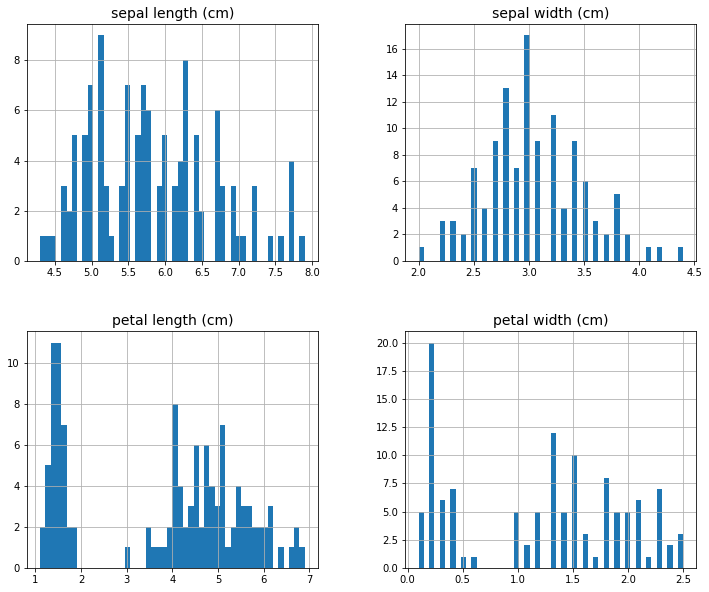

In [ ]:
X_train.hist(bins=50, figsize=(12, 10))
plt.show() # to supress the textual outputs

The petal length and petal width seem to show a separation between 2 classes.

We generate pairwise scatter plot:
* The diagonal plot the marginal distribution of each feature for each class.
* The off-diagonals contain scatter plots of all possible pairs of features

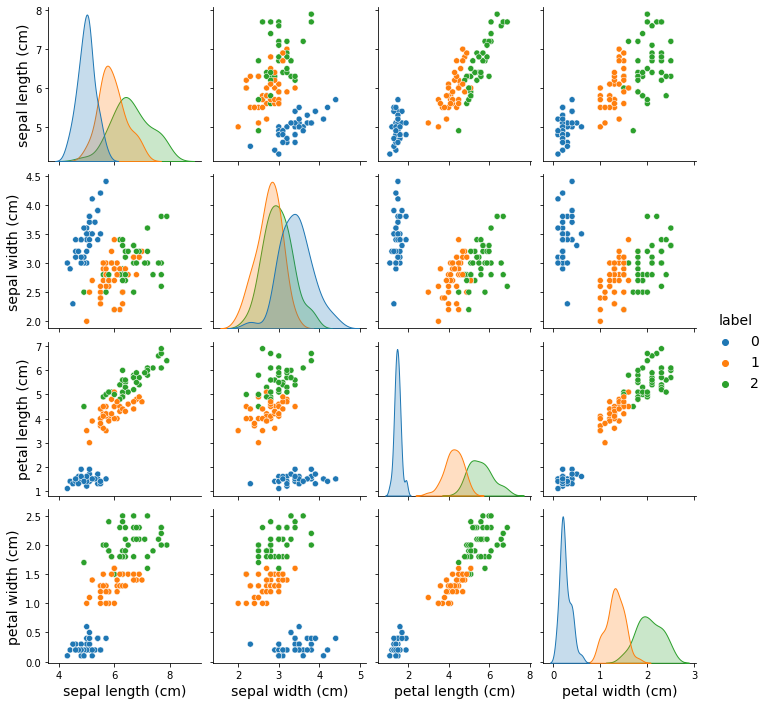

In [ ]:
import seaborn as sns
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and 
# informative statistical graphics.

df = X_train.copy()
df['label'] = pd.Series(y_train, dtype='category')
sns.pairplot(df, vars=df.columns[0:4], hue="label")
plt.show()

Let's look at the correlations between each pair of features

In [ ]:
corr_matrix = X_train.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.112327,0.880401,0.820297
sepal width (cm),-0.112327,1.000000,-0.398502,-0.338741
petal length (cm),0.880401,-0.398502,1.000000,0.963693
petal width (cm),0.820297,-0.338741,0.963693,1.000000


# 3. Preprocess the data and make it ready for machine learning algorithms

There is nothing to be done for the simple Iris dataset. However, other datasets might require:
* Data cleaning: 
   * Fill in missing values with zero, mean, median....etc. ([imputing](https://scikit-learn.org/stable/modules/impute.html)). Or maybe drop their rows or even the whole column
   * Fix or remove outliers
* Feature engineering:
   * Discretize continous features
   * Decompose features (e.g., categorical, date/time, etc.)
   * Transform some features (e.g., $log(x)$, $\sqrt{(x)}$, $x^2$,...etc.)
   * Combine features into new features
* Feature scaling: Standarize or normalize the features


# 4. Explore many different models and shortlist the best ones

`sklearn` provides several [classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). However, we will use estimators' default evaluation criterion, which can be accessed using the `score` method

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_clf.score(X_train, y_train)

0.975

In [ ]:
# compare predicted values vs actual values
y_predict = lda_clf.predict(X_train)
y_predict[0:5]

array([0, 2, 1, 0, 1])

In [ ]:
y_train.iloc[:5].values

array([0, 2, 1, 0, 1])

In [ ]:
# show the misclassified instances
y_predict[y_predict != y_train]

array([1, 2, 2])

In [ ]:
y_train[y_predict != y_train]

133    2
70     1
83     1
Name: target, dtype: int64

In [ ]:
X_train[y_predict != y_train]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
70,5.9,3.2,4.8,1.8
83,6.0,2.7,5.1,1.6


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
qda_clf.score(X_train, y_train)

0.975

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_clf.score(X_train, y_train)

0.9583333333333334

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

1.0

In [ ]:
y_predict = tree_clf.predict(X_train)
y_predict[0:5]

array([0, 2, 1, 0, 1])

In [ ]:
y_train.iloc[:5].values

array([0, 2, 1, 0, 1])

No errors! The tree has probably overfit the training set. Do not evaluate the model on the test set yet. Use a validation set

## Model validation

To evaluate the perfromance of the different models we can split the training set into a smaller training set and a validation set (using `train_test_split`). The validation set can be then used to score the performance of each model on data it wasn't trained on.

`skelarn` provides a much better alternative `cross_val_score`. The method splits the training set into several non-overlapping subsets called folds, then it trains the estimator "folds" number of times. In each training session, it picks one of the folds for validation and the rest for training. The method returns an array of validation scores, which means we can estimate the performance of the estimator on unseen data and also estimate how confident we are with this estimate (i.e. using standard deviation). However, this comes at the cost of training the model several times.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lda_scores = cross_val_score(lda_clf, X_train, y_train, cv=10)
pd.Series(lda_scores).describe()

count    10.000000
mean      0.966667
std       0.043033
min       0.916667
25%       0.916667
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [ ]:
qda_scores = cross_val_score(qda_clf, X_train, y_train, cv=10)
pd.Series(qda_scores).describe()

count    10.000000
mean      0.975000
std       0.040254
min       0.916667
25%       0.937500
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [ ]:
gnb_scores = cross_val_score(gnb_clf, X_train, y_train, cv=10)
pd.Series(gnb_scores).describe()

count    10.000000
mean      0.958333
std       0.058926
min       0.833333
25%       0.916667
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [ ]:
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
pd.Series(tree_scores).describe()

count    10.000000
mean      0.958333
std       0.043921
min       0.916667
25%       0.916667
50%       0.958333
75%       1.000000
max       1.000000
dtype: float64

The tree seems to be overfitting the training set (no errors on the training set but 95% accuracy on the validation set)

Quadratic discriminative analysis seems to be performing the best. 

# 5. Fine-tune your models and combine them into a great solution

There are no hyperparameters for the models used in this notebook. If there were use `GridSearchCV` or `RandomizedSearchCV` to search for a good hyperparameters combination


## Evaluate your system on the test set

In [ ]:
qda_clf.score(X_test, y_test)

1.0

You should not change the model (or any hyperparameters) after measuring the generalization error using the test set. If you do, you risk overfitting the test set and getting an optimistic error rate.

# Homework project

Work on the [MNIST](https://www.openml.org/search?type=data&sort=runs&id=554&status=active) dataset

1. Get the data
  * Use `fetch_openml` from `sklearn.datasets`
  * The MNIST dataset is already split into train/test set. Use the first 60,000 images for training and the last 10,000 images for testing
2. Look at the data
  * Write a function `plot_digit(image_data, label)` to display `image_data` and an optional `label`. Assume that `image_data` is 1-demensional vector of size 784 (you need to reshape it to 2D 28x28). The `label` can be used as the image title
  * Write a function `plot_digits(image_data, labels)` to display several digits (for example display an array 5x5 of digits) You should use `plot_digit` in your implementation
3. Preprocess the data and make it ready for ML algorithms
  * The MNIST datasets contains grayscale images with values between 0 to 255. You might want to binarize these images before training your model
4. Explore many different models and shortlist the best ones
  * Select a few classifiers and use cross validation to select the best candidate
5. Fine-tune your models and combine them into a good solution
  * If you selected a model with hyperparamters, fine-tune these hyperparameters. You can skip this step if you didn't use models with hyperparameters
6. Evaluate your model on the test set and report the final score